# <center> Support Vector Machine with Grid Search
SVM is trained on feature set 1

## <font color='royalblue'> Get the data 

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 3.00880939,  0.26443017,  1.05370334, ...
X_32_val                  -> array([[-0.13964146,  0.53184264, -0.71694033, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[-0.1396414
X_32train_std             -> array([[-0.80277066, -0.49489511, -0.83240094, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[-0.006215
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 3.0088093
X_train                   -> array([[[-0.01174874, -0.00817356, -0.0042913 , ..
X_train_std               -> array([[-0.80277066, -0.49489511, -0.83240094, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([3, 5, 1, ..., 2, 4, 0])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 3, ..
y_32_train                -> array([5, 0, 2, ..., 4, 6, 6])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_train_std.shape, "and labels: ", y_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_test_std), X_test_std[18].shape, "arrays for SNR values:")
print(sorted(X_test_std.keys()))

Training data:  (80000, 16) and labels:  (80000,)
 
Test data:
Total 20 (4000, 16) arrays for SNR values:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## <font color='royalblue'>Train and test the classifier

In [9]:
#Train the classifier

from sklearn import svm

params = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

grid_search_cv = GridSearchCV(svm.SVC(cache_size = 5000), params, verbose=1)

start = time()
grid_search_cv.fit(X_train_std, y_train)
print("Grid search took %.2f minutes "%((time() - start)//60))
print("   ")
print("Result of grid search, best estimator:")
print(grid_search_cv.best_estimator_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 913.2min finished


Grid search took 920.00 minutes 
   
Result of grid search, best estimator:
SVC(C=100.0, cache_size=5000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


##### Grid search tries 6x6 = 36 combinations (6 values of C and 6 values of gamma). Also, the default is 3 folds of cross validation. So total 36x3 = 108 runs

In [4]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("Test the classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = grid_search_cv.predict(X_test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_test[snr], y_pred[snr])
    print("SVM's accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR value

Test the classifier
 
SVM's accuracy on -20 dB SNR samples =  0.1225
SVM's accuracy on -18 dB SNR samples =  0.11975
SVM's accuracy on -16 dB SNR samples =  0.13175
SVM's accuracy on -14 dB SNR samples =  0.14225
SVM's accuracy on -12 dB SNR samples =  0.16075
SVM's accuracy on -10 dB SNR samples =  0.17175
SVM's accuracy on -8 dB SNR samples =  0.25325
SVM's accuracy on -6 dB SNR samples =  0.33875
SVM's accuracy on -4 dB SNR samples =  0.4035
SVM's accuracy on -2 dB SNR samples =  0.4015
SVM's accuracy on 0 dB SNR samples =  0.45525
SVM's accuracy on 2 dB SNR samples =  0.6095
SVM's accuracy on 4 dB SNR samples =  0.75125
SVM's accuracy on 6 dB SNR samples =  0.779
SVM's accuracy on 8 dB SNR samples =  0.7745
SVM's accuracy on 10 dB SNR samples =  0.784
SVM's accuracy on 12 dB SNR samples =  0.7755
SVM's accuracy on 14 dB SNR samples =  0.7905
SVM's accuracy on 16 dB SNR samples =  0.775
SVM's accuracy on 18 dB SNR samples =  0.77675


## <font color='royalblue'> Visualize classifier performance

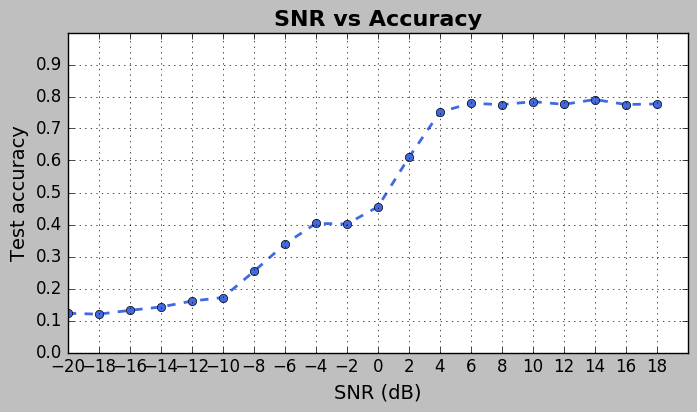

In [5]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

In [7]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import pandas as pd

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
y_predicted = grid_search_cv.predict(X_test_std[18])
conf_matrix = confusion_matrix(y_predicted, y_test[18]) 

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix Without Normalization")
print(df)

Confusion Matrix Without Normalization
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK    400     2      0     0     3     48     53    14
BPSK      0   483      0     0    11      3      7     2
CPFSK    46     1    456   101     1      1      0     4
GFSK     12     1     44   399     1      3     12     6
PAM4      1    12      0     0   482      7      3     0
QAM16     9     1      0     0     0    141    116    12
QAM64    10     0      0     0     1    258    290     6
QPSK     22     0      0     0     1     39     19   456


Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.77  0.00   0.00  0.00  0.01   0.09   0.10  0.03
BPSK   0.00  0.95   0.00  0.00  0.02   0.01   0.01  0.00
CPFSK  0.08  0.00   0.75  0.17  0.00   0.00   0.00  0.01
GFSK   0.03  0.00   0.09  0.83  0.00   0.01   0.03  0.01
PAM4   0.00  0.02   0.00  0.00  0.95   0.01   0.01  0.00
QAM16  0.03  0.00   0.00  0.00  0.00   0.51   0.42  0.04
QAM64  0.02  0.00   0.00  0.00  0.00   0.46   0.51  0.01
QPSK   0.04  0.00   0.00  0.00  0.00   0.07   0.04  0.85


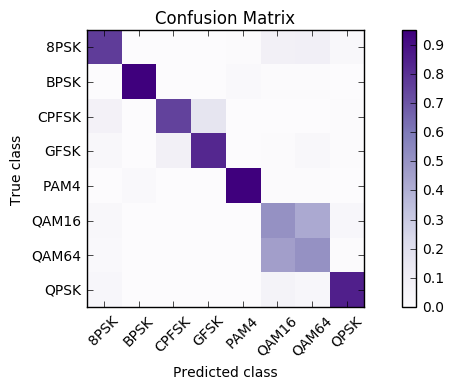

In [3]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
y_predicted = grid_search_cv.predict(X_test_std[18])
conf_matrix = confusion_matrix(y_predicted, y_test[18])  

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

import pandas as pd

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

In [12]:
from sklearn.externals import joblib

joblib.dump(grid_search_cv, "svm2.pkl")

['svm2.pkl']

In [5]:
import pickle
from sklearn.externals import joblib

grid_search_cv = joblib.load("svm2.pkl")